### Install DICES client software

This step is only necessary once on most machines, but because Google Colab runs this notebook on a fresh virtual machine every time, we always need to install DICES as the first step.

In [5]:
!pip install -q git+https://github.com/cwf2/dices-client

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


### Import statements

This tells Python which ancillary functions we want to use in this notebook.

In [6]:
from dicesapi import DicesAPI
from dicesapi.text import CtsAPI
import pandas as pd

### Initialize connection to external sources

This creates connections to the speech database and to the digital library.

In [7]:
# DICES database
api = DicesAPI(logdetail = 0)

# Perseus Digital Library
cts = CtsAPI(dices_api = api)

[GENE]Database Initialized

### Get some speeches

This is the basic search function to get speeches from DICES according to specific parameters.

In [16]:
speeches = api.getSpeeches(spkr_name="Achilles")
n = len(speeches)
print(f"Retrieved {n} speeches")

Retrieved 111 speeches,


### Print out some basic information about the speeches

This loops over each speech in turn and prints out its attributes, separated by a tab.


In [18]:
for speech in speeches:
    print(speech.id, speech.author.name, speech.work.title, speech.l_fi, speech.l_la, speech.getSpkrString(), speech.getAddrString(), sep="\t")

4	Homer	Iliad	1.59	1.67	Achilles	Agamemnon
6	Homer	Iliad	1.85	1.91	Achilles	Calchas
9	Homer	Iliad	1.122	1.129	Achilles	Agamemnon
11	Homer	Iliad	1.149	1.171	Achilles	Agamemnon
13	Homer	Iliad	1.202	1.205	Achilles	Athena
15	Homer	Iliad	1.216	1.218	Achilles	Athena
16	Homer	Iliad	1.225	1.244	Achilles	Agamemnon
19	Homer	Iliad	1.293	1.303	Achilles	Agamemnon
21	Homer	Iliad	1.334	1.344	Achilles	Eurybates, Patroclus, Talthybius
22	Homer	Iliad	1.352	1.356	Achilles	Thetis
24	Homer	Iliad	1.365	1.412	Achilles	Thetis
238	Homer	Iliad	9.197	9.198	Achilles	Aias (son of Telamon), Odysseus, Phoinix
239	Homer	Iliad	9.202	9.204	Achilles	Patroclus
242	Homer	Iliad	9.308	9.429	Achilles	Odysseus
244	Homer	Iliad	9.607	9.619	Achilles	Phoinix
246	Homer	Iliad	9.644	9.655	Achilles	Aias (son of Telamon)
312	Homer	Iliad	11.608	11.615	Achilles	Patroclus
420	Homer	Iliad	16.7	16.19	Achilles	Patroclus
422	Homer	Iliad	16.49	16.100	Achilles	Patroclus
423	Homer	Iliad	16.126	16.129	Achilles	Patroclus
424	Homer	Iliad	16.200	16

### Extract book and line numbers from the loci

The loci are recorded as *strings*, that is, sequences of characters rather than as numeric data. Here we split each locus into two parts based on the "." character, and convert each part to a number (integer or `int`).

For our purposes, we don't need to print the names of the speakers and addressees, so we'll leave that out.

In [19]:
for speech in speeches:
    loc_first = speech.l_fi
    loc_last = speech.l_la

    book_first, line_first = loc_first.split(".")
    book_last, line_last = loc_last.split(".")

    book_first = int(book_first)
    line_first = int(line_first)
    book_last = int(book_last)
    line_last = int(line_last)

    print(speech.id, speech.author.name, speech.work.title, book_first, line_first, line_last, sep="\t")

4	Homer	Iliad	1	59	67
6	Homer	Iliad	1	85	91
9	Homer	Iliad	1	122	129
11	Homer	Iliad	1	149	171
13	Homer	Iliad	1	202	205
15	Homer	Iliad	1	216	218
16	Homer	Iliad	1	225	244
19	Homer	Iliad	1	293	303
21	Homer	Iliad	1	334	344
22	Homer	Iliad	1	352	356
24	Homer	Iliad	1	365	412
238	Homer	Iliad	9	197	198
239	Homer	Iliad	9	202	204
242	Homer	Iliad	9	308	429
244	Homer	Iliad	9	607	619
246	Homer	Iliad	9	644	655
312	Homer	Iliad	11	608	615
420	Homer	Iliad	16	7	19
422	Homer	Iliad	16	49	100
423	Homer	Iliad	16	126	129
424	Homer	Iliad	16	200	209
426	Homer	Iliad	16	233	248
443	Homer	Iliad	16	839	841
480	Homer	Iliad	18	6	14
484	Homer	Iliad	18	79	93
486	Homer	Iliad	18	98	126
490	Homer	Iliad	18	182	182
492	Homer	Iliad	18	188	195
496	Homer	Iliad	18	324	342
506	Homer	Iliad	19	21	27
508	Homer	Iliad	19	56	73
513	Homer	Iliad	19	146	153
516	Homer	Iliad	19	199	214
519	Homer	Iliad	19	270	275
521	Homer	Iliad	19	305	308
522	Homer	Iliad	19	315	337
524	Homer	Iliad	19	400	403
526	Homer	Iliad	19	420	423
534	Homer	Iliad	20	178

### Putting it all together

### Make a table

Python can work with tabular data like a spreadsheet with the help of the ancillary package Pandas. Here we make the same data into a Pandas DataTable.

In [23]:
# an empty list to hold the rows
rows = list()

# iterate over the speeches
for speech in speeches:
    # separate book and line numbers
    book_first, line_first = speech.l_fi.split(".")
    book_last, line_last = speech.l_la.split(".")

    # calculate length of speech
    nlines = int(line_last) - int(line_first) + 1

    # create a new row, labelling all the data values
    row = {
        "id": speech.id,
        "author": speech.author.name,
        "work": speech.work.title,
        "book": int(book_first),
        "first_line": line_first,
        "last_line": line_last,
        "num_lines": nlines,
        }

    # add the row to the list
    rows.append(row)

# make the table
table = pd.DataFrame(rows)

# write the table to a file for import to Excel
table.to_csv("speeches.tsv", sep="\t", index=False)

# display the table
display(table)

,id,author,work,book,first_line,last_line,num_lines
0,4,Homer,Iliad,1,59,67,9
1,6,Homer,Iliad,1,85,91,7
2,9,Homer,Iliad,1,122,129,8
3,11,Homer,Iliad,1,149,171,23
4,13,Homer,Iliad,1,202,205,4
...,...,...,...,...,...,...,...
106,3302,Statius,Achilleid,1,657,660,4
107,3311,Statius,Achilleid,1,892,910,19
108,3313,Statius,Achilleid,2,17,19,3
109,3315,Statius,Achilleid,2,43,48,6


### Summarize data

Just like in Excel, we can summarize tabular data with a pivot table (draaitabel). In this example, we'll count how many speeches are attributed to Achilles in our whole corpus.

We need to specify which columns in the original table we want to use:
- The rows (or "index") of our summary table will come from `work`. Each work gets one row in the new table.
- The columns will come from `id`, i.e., each of Achilles' speeches' assigned ID number.
- We'll derive the values for each cell from the `id` column: that is, we're going to count how many speeches Achilles gets in each work.

We also need to specify how we want to summarize the speech ids. In this case, we just want to count them. We tell Python this using the `aggfunc` ("aggregation function") parameter.

In [26]:
count_Aspeeches = table.pivot_table(index="work", values="id", aggfunc="count")

display(count_Aspeeches)

,id
work,
Achilleid,7
Iliad,88
Metamorphoses,5
Odyssey,3
Posthomerica,8


### Rename headers

If you don't like the names of the columns or rows in your table, you can rename them.

In [29]:
count_Aspeeches.rename(columns={"id":"speeches"}, inplace=True)
display(count_Aspeeches)

,speeches
work,
Achilleid,7
Iliad,88
Metamorphoses,5
Odyssey,3
Posthomerica,8


### Make a graph

Pandas has some basic visualization functions built in. Let's turn the summary table above into a bar graph.

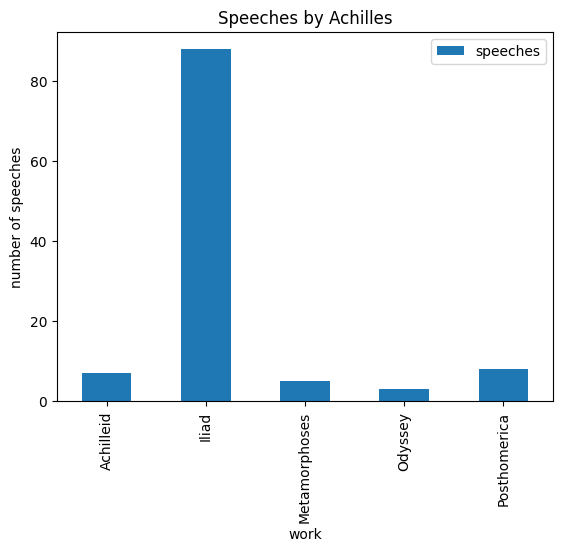

In [31]:
# generate a bar graph
plot_by_book = count_Aspeeches.plot.bar(title="Speeches by Achilles", ylabel="number of speeches")

# save to an image file
plot_by_book.figure.savefig("speech_count_by_Aspeeches.png")